<a href="https://colab.research.google.com/github/PariaNajafi/Housing_Price_2000_2022/blob/main/Housing_Price_1stProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#REAL ESTATE SALES ANALYSIS & PREDICTION

##Data Exploration


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget -O Real_Estate_Sales_2001_2022_GL.csv "https://data.ct.gov/api/views/5mzw-sjtu/rows.csv?accessType=DOWNLOAD"


In [ ]:
data = pd.read_csv('/content/Real_Estate_Sales_2001_2022_GL.csv')

In [ ]:
data.head()

In [ ]:
data.info()

to train a model we need numerical columns, we should convert which object column we could to numerical ones,with converting them to categorical ...

In [ ]:
numerical_columns=data.select_dtypes(include='number').columns
#['Serial Number', 'List Year', 'Assessed Value', 'Sale Amount', 'Sales Ratio']

object_columns = data.select_dtypes(include='object').columns
print(numerical_columns, object_columns)


In [ ]:
data[numerical_columns].describe()


mean price is 400,000. the average is 233,000. the max price is 5 billion dollars.

In [ ]:
data[object_columns].describe()

Most of the real estate deals have been done in the city of Bridgeport with 38000 frequency<br>
The single-family type has had the most transactions in housing transactions.

In [ ]:
len_data = data.shape[0]
print(len_data)
data.isnull().sum()*100/len_data

The total number of data is 1,097,629.

In [ ]:
data.isnull().sum()

In [ ]:
 data['Location'].notna().sum()

In [ ]:
data.nunique()

In [ ]:
data.duplicated().sum()

## Data Distribution

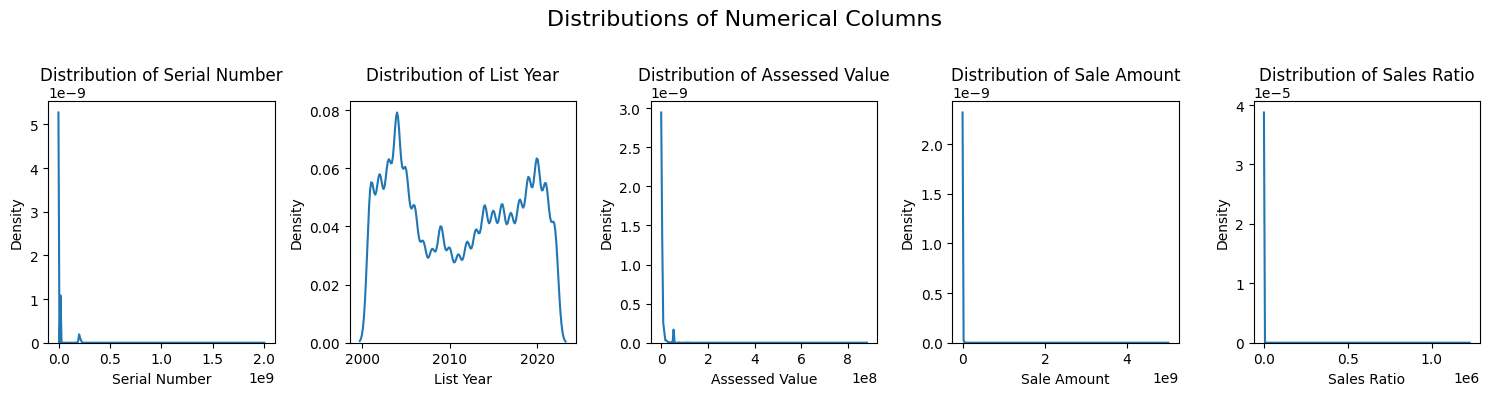

In [ ]:
fig, axes = plt.subplots(1, len(numerical_columns), figsize=(15, 4))
fig.suptitle('Distributions of Numerical Columns', fontsize=16)

for i, col in enumerate(numerical_columns):
    sns.kdeplot(data[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', pad=15)

plt.tight_layout()
plt.subplots_adjust(top=0.75)
plt.show()

The graphs of numerical features show non-Gaussian distribution of data as seen from the very spiky graph

## Correlation Heatmap

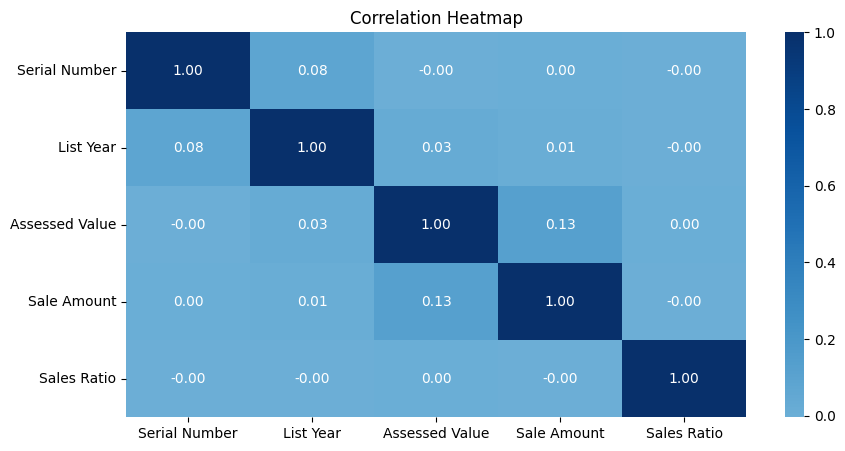

In [ ]:
corr_matrix = data[numerical_columns].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
print(data['Sale Amount'].max())
print(data['Sale Amount'].quantile(0.75))
data_without_the_max = data[data['Sale Amount'] < data['Sale Amount'].max()]

5000000000.0
375000.0


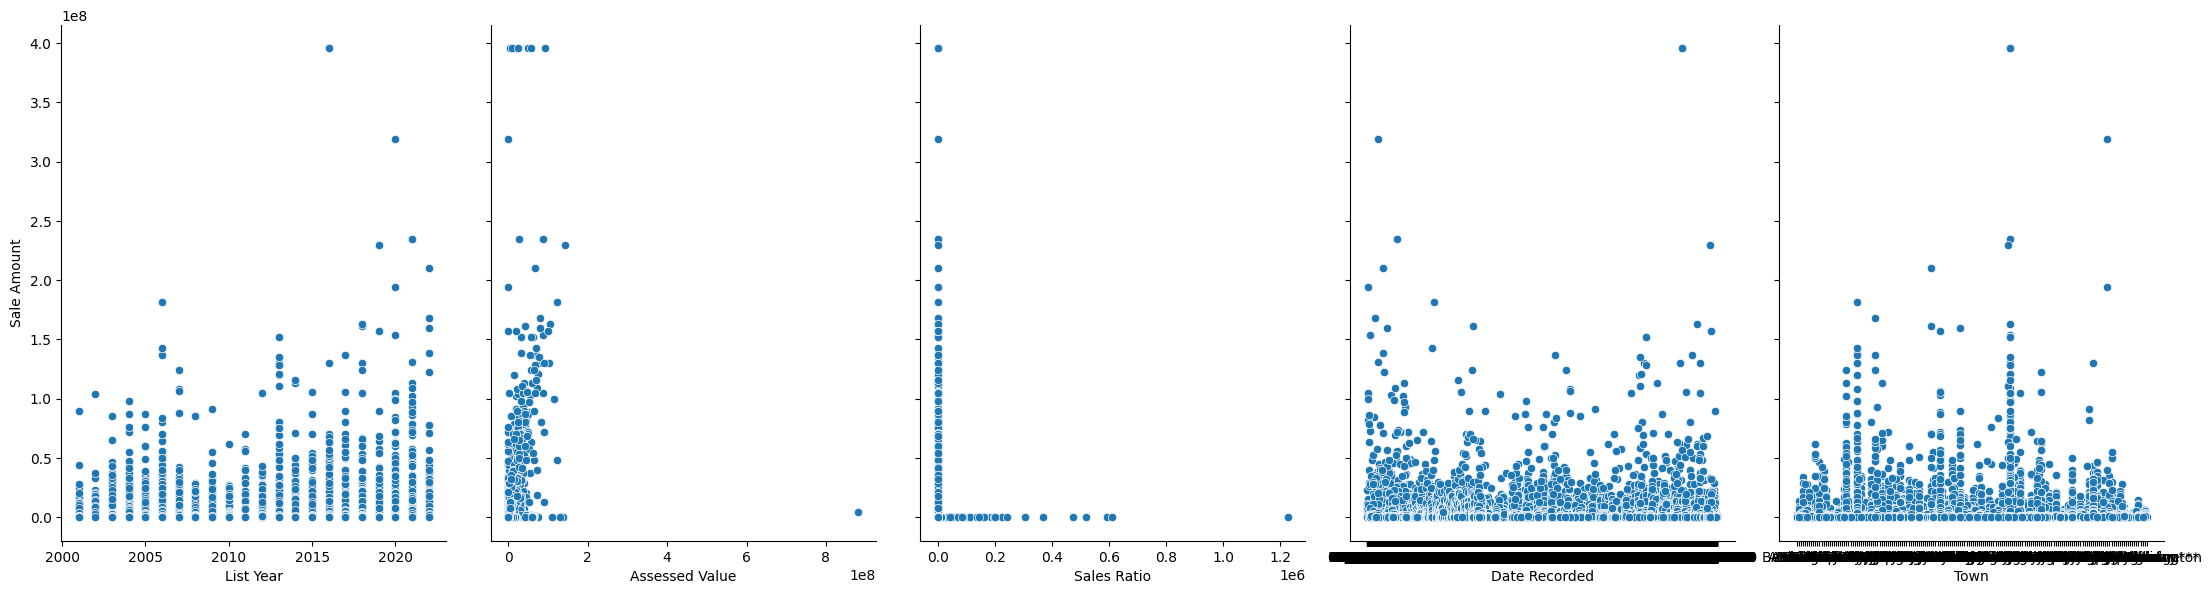

In [ ]:
# Pairplot to see the correlation with the target: Sale Amount

fig = sns.pairplot(data=data_without_the_max, x_vars=['List Year', 'Assessed Value','Sales Ratio', 'Date Recorded', 'Town'],
                   y_vars=['Sale Amount'], height=6, aspect=0.75);


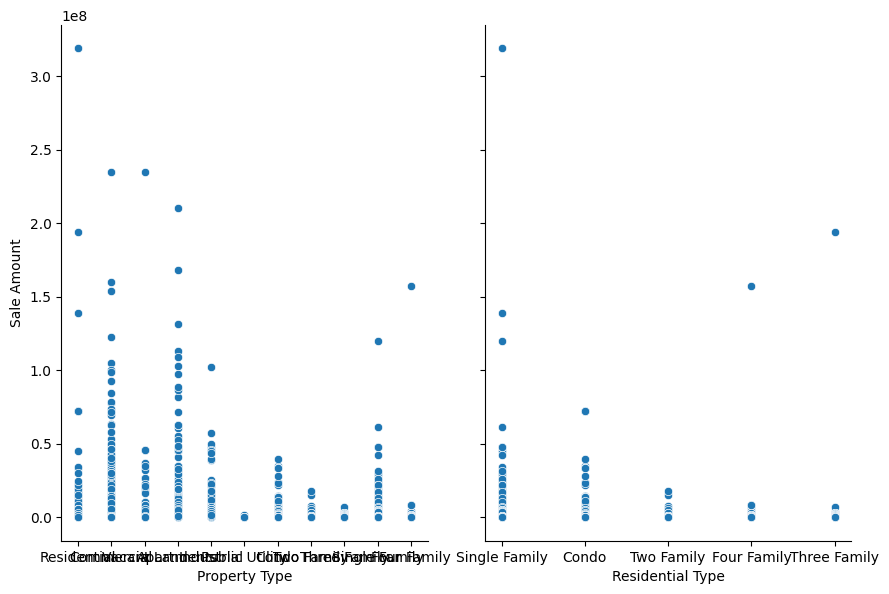

In [ ]:
fig = sns.pairplot(data=data_without_the_max, x_vars=[ 'Property Type', 'Residential Type'],
                   y_vars=['Sale Amount'], height=6, aspect=0.75);


##VISUALIZING

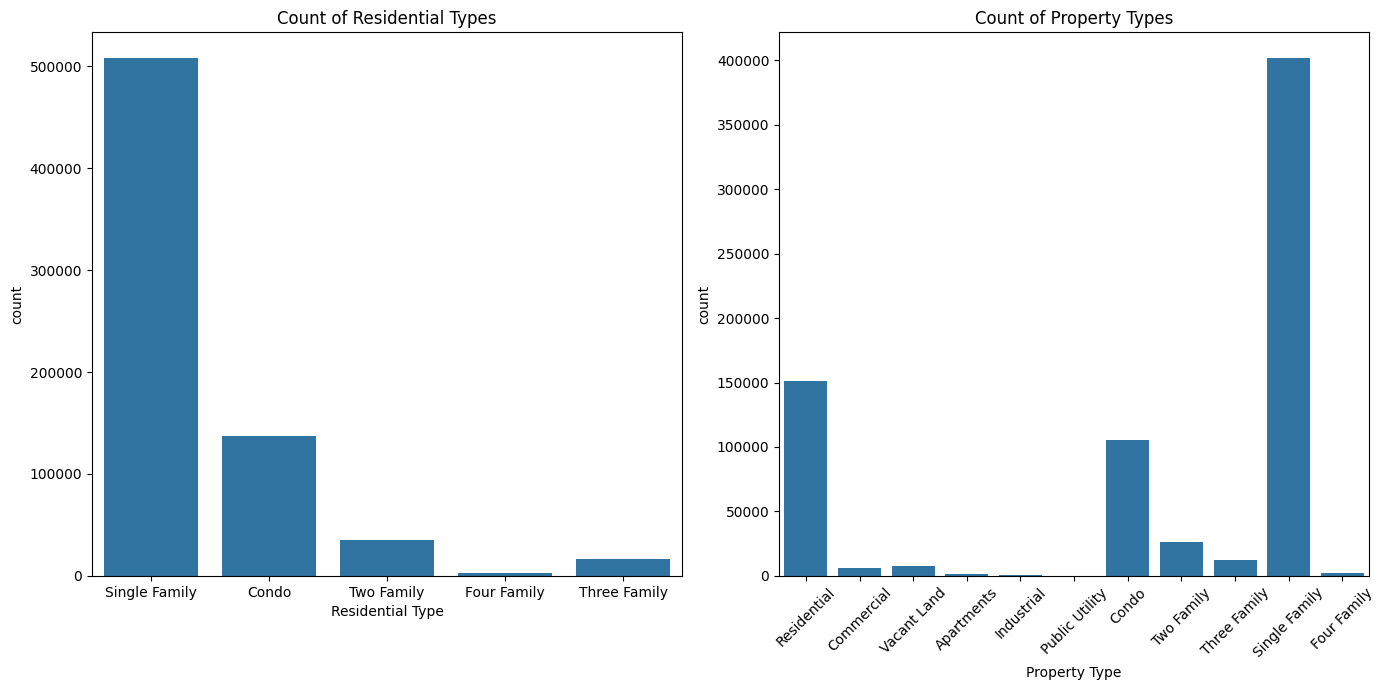

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14,7))

sns.countplot(data=data, x="Residential Type", ax=axes[0])
axes[0].set_title("Count of Residential Types")
sns.countplot(data=data, x="Property Type", ax=axes[1])
axes[1].set_title("Count of Property Types")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Most of the properties and residual types is for single family.

In [ ]:
average_rt = data.groupby(data['Residential Type'])['Sales Ratio'].mean().dropna()
average_pt = data.groupby(data['Property Type'])['Sales Ratio'].mean().dropna()

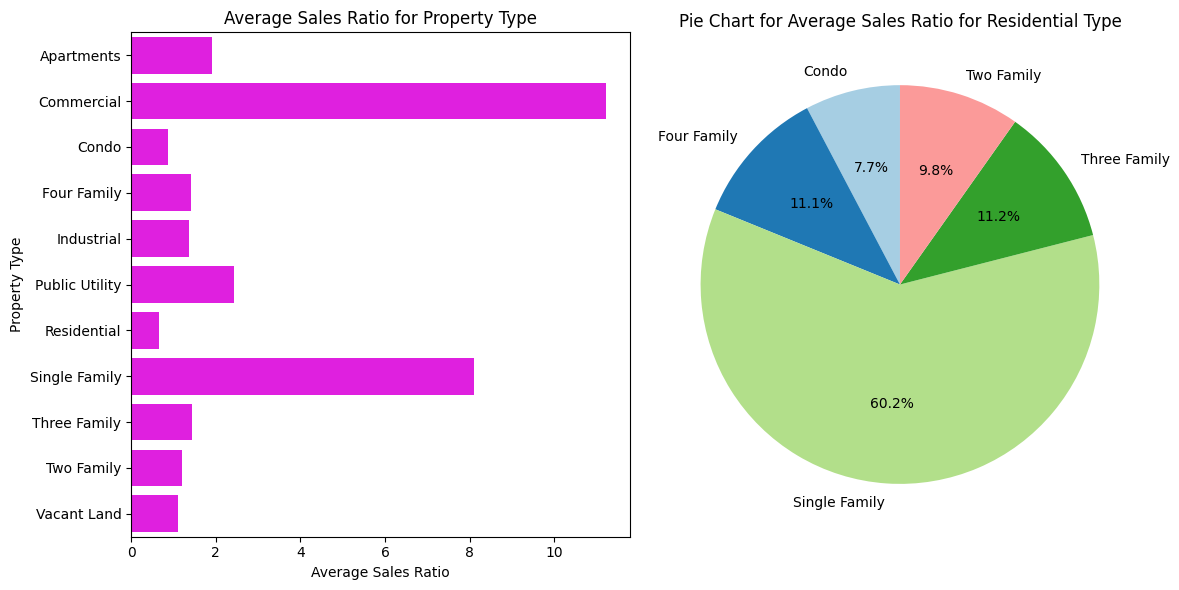

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot area plot for 'Property Type'
sns.barplot(x=average_pt.values, y=average_pt.index, ax=axes[0], color='magenta')
axes[0].set_title('Average Sales Ratio for Property Type')
axes[0].set_xlabel('Average Sales Ratio')
axes[0].set_ylabel('Property Type')

# Plot pie chart for 'Residential Type'
axes[1].pie(average_rt, labels=average_rt.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axes[1].set_title('Pie Chart for Average Sales Ratio for Residential Type')

plt.tight_layout()
plt.show()


Sales ratio refers to the ratio between the actual sale price of a property and its assessed or estimated value.<br> It helps determine if a property was sold for more, less, or exactly at its appraised value.

The plot shows that commercial properties, with an average sales ratio of 11,<br> and single-family properties, with a ratio of 8, have been sold with a large deviation from their assessed values.



<Axes: xlabel='Property Type'>

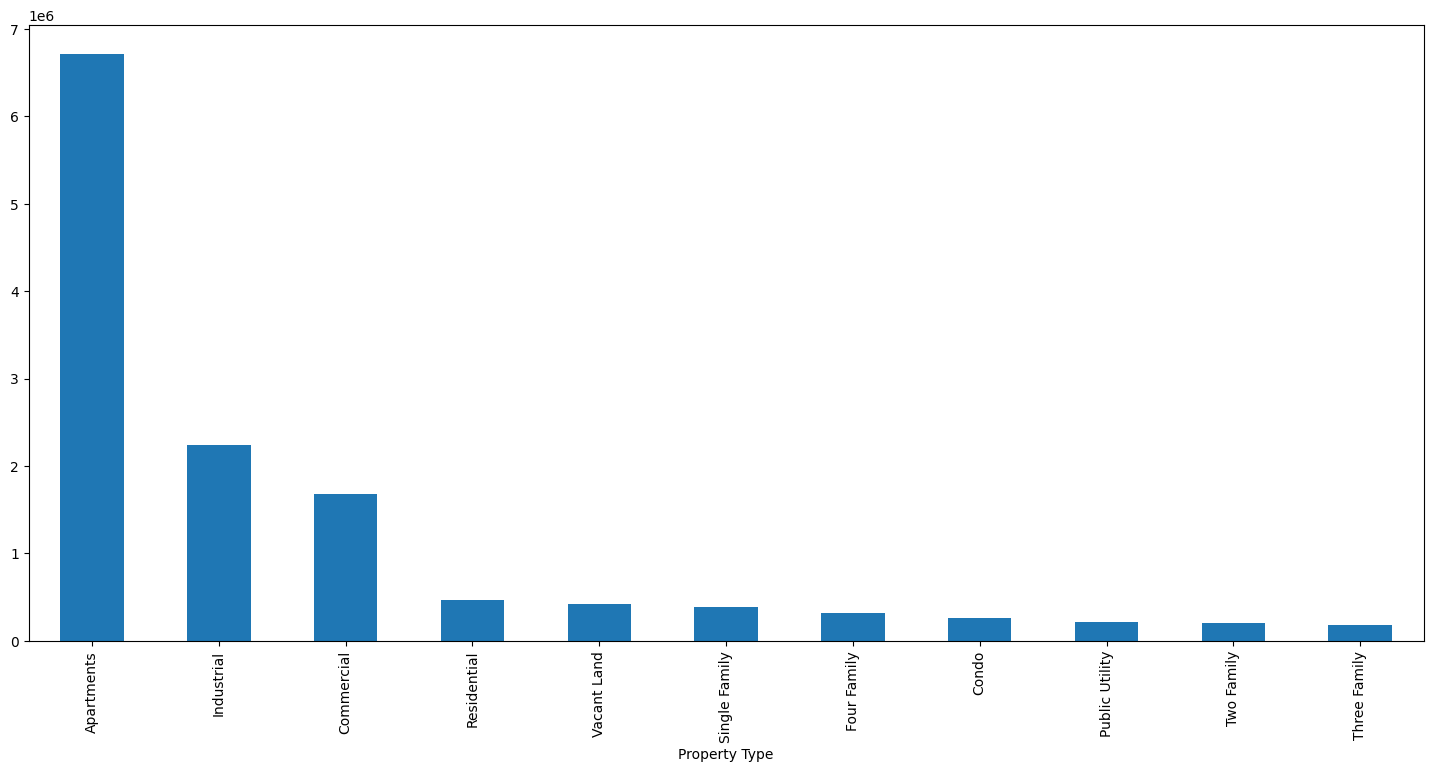

In [ ]:
plt.figure(figsize=(18,8))
data.groupby("Property Type")["Sale Amount"].mean().sort_values(ascending=False).plot(kind="bar")

 apartment prices are the highest

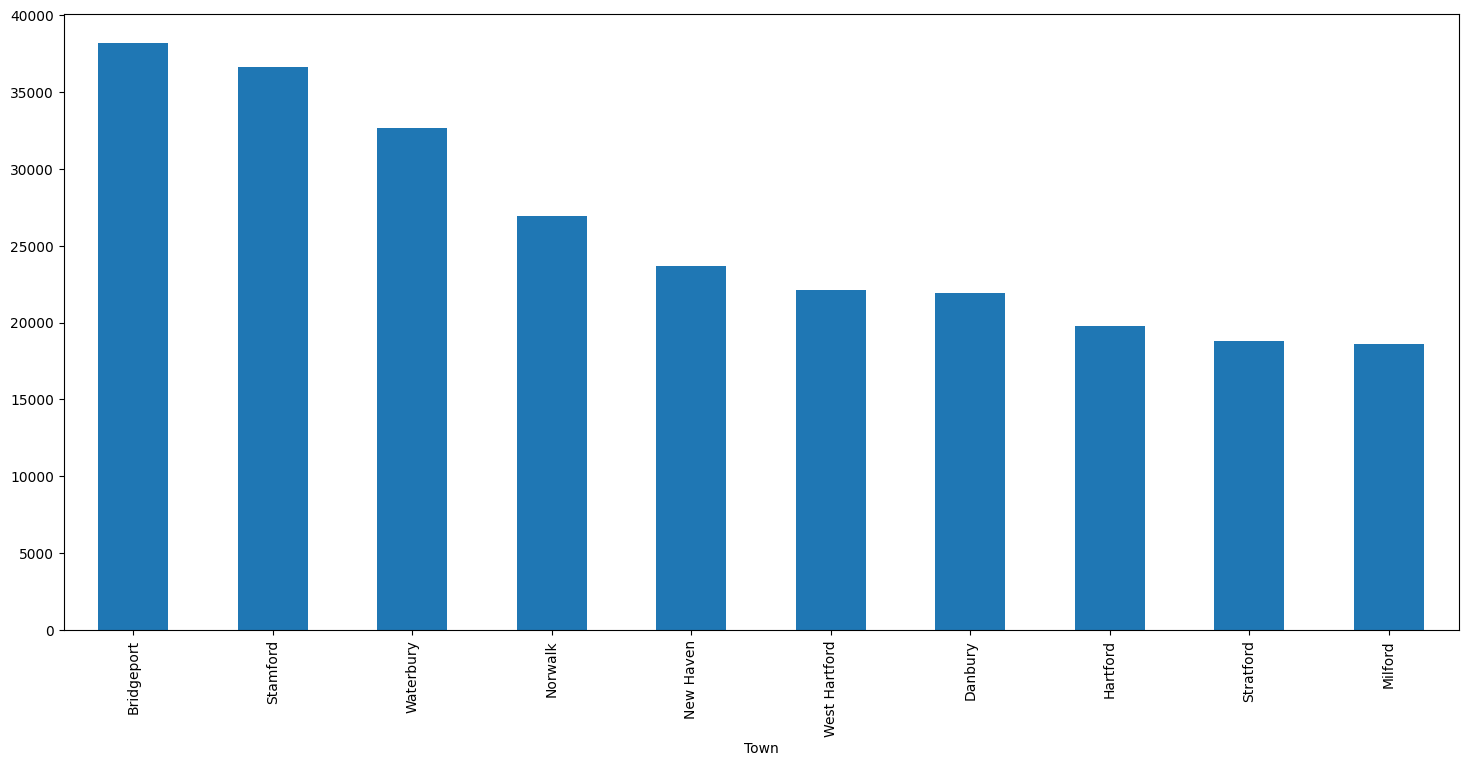

In [ ]:
plt.figure(figsize=(18,8))
top_10_towns = data["Town"].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')

Most of sales are in bridgeport


<Axes: xlabel='Town'>

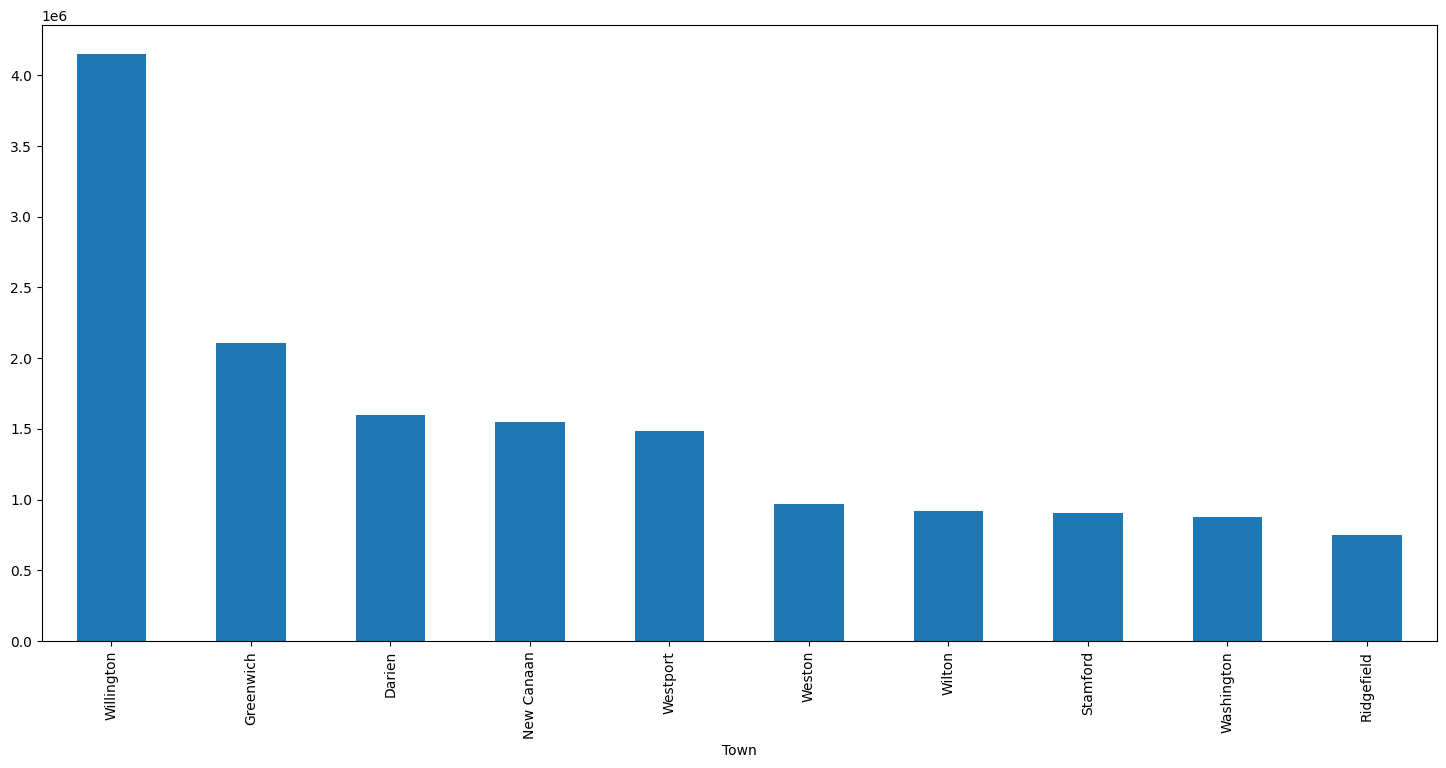

In [ ]:
# Top 10
plt.figure(figsize=(18,8))
data.groupby("Town")["Sale Amount"].mean().sort_values(ascending=False).head(10).plot(kind="bar")

houses in willington is most expernsive

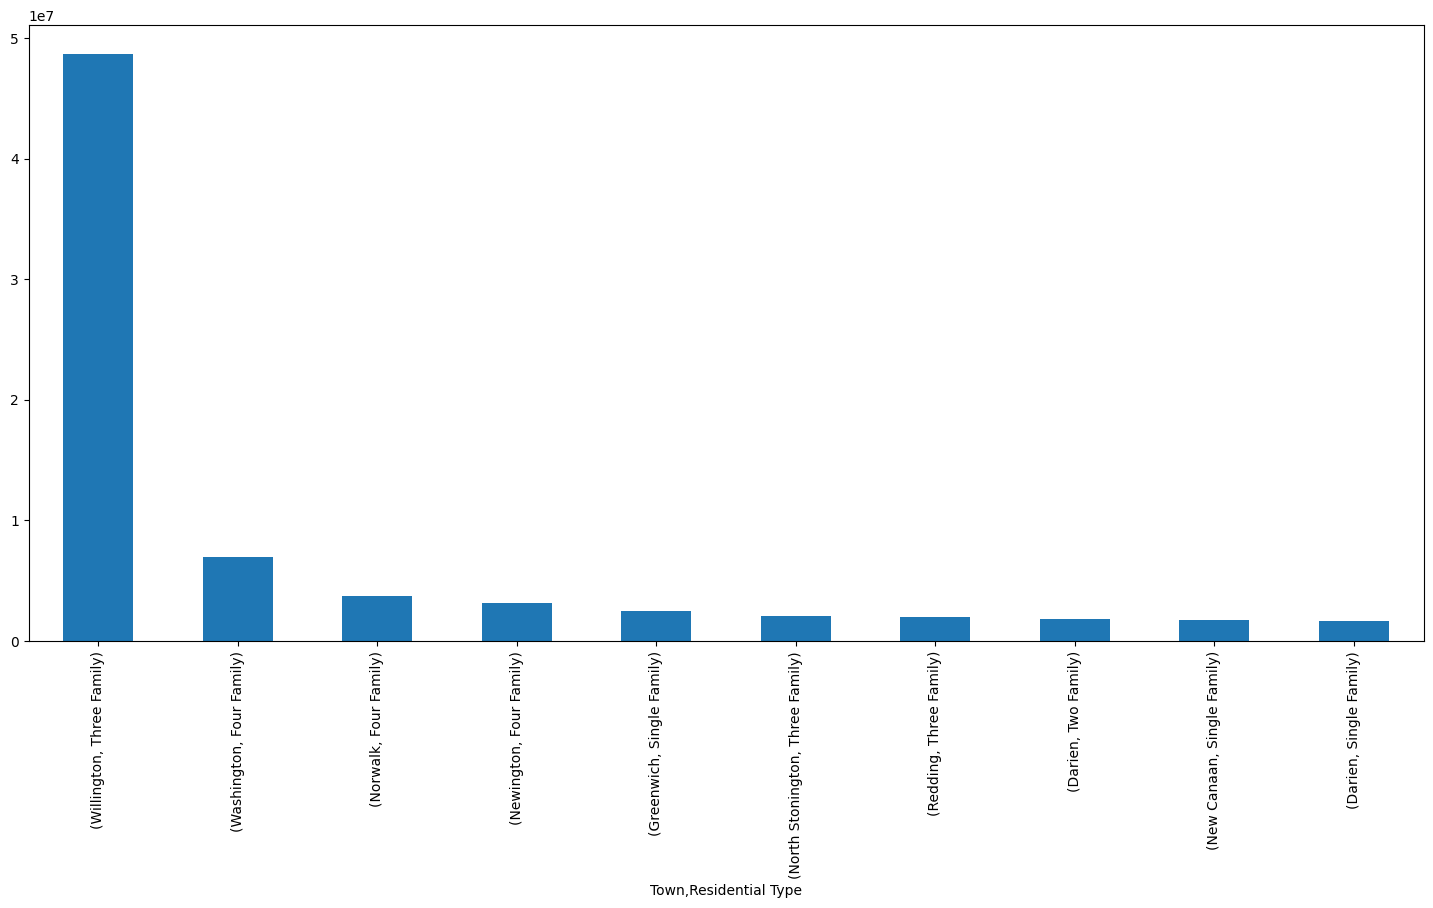

In [ ]:
plt.figure(figsize=(18,8))
data.groupby(["Town","Residential Type"])["Sale Amount"].mean().sort_values(ascending=False).head(10).plot(kind="bar");

Three family houses are most expensive in willington

<Axes: xlabel='Residential Type'>

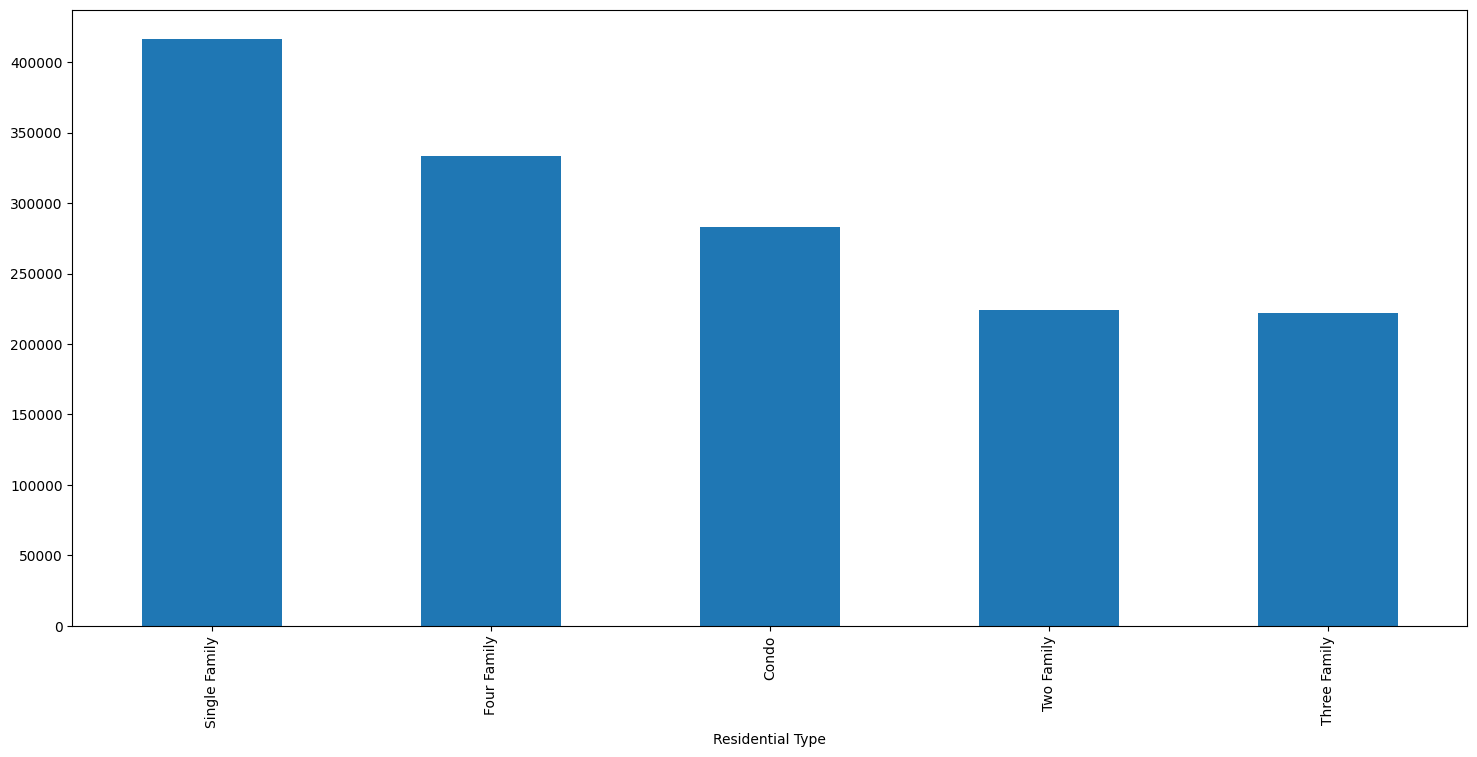

In [ ]:
plt.figure(figsize=(18,8))
data.groupby("Residential Type")["Sale Amount"].mean().sort_values(ascending=False).head(10).plot(kind="bar")

Single Family Residential Type is most expensive

<Axes: xlabel='List Year'>

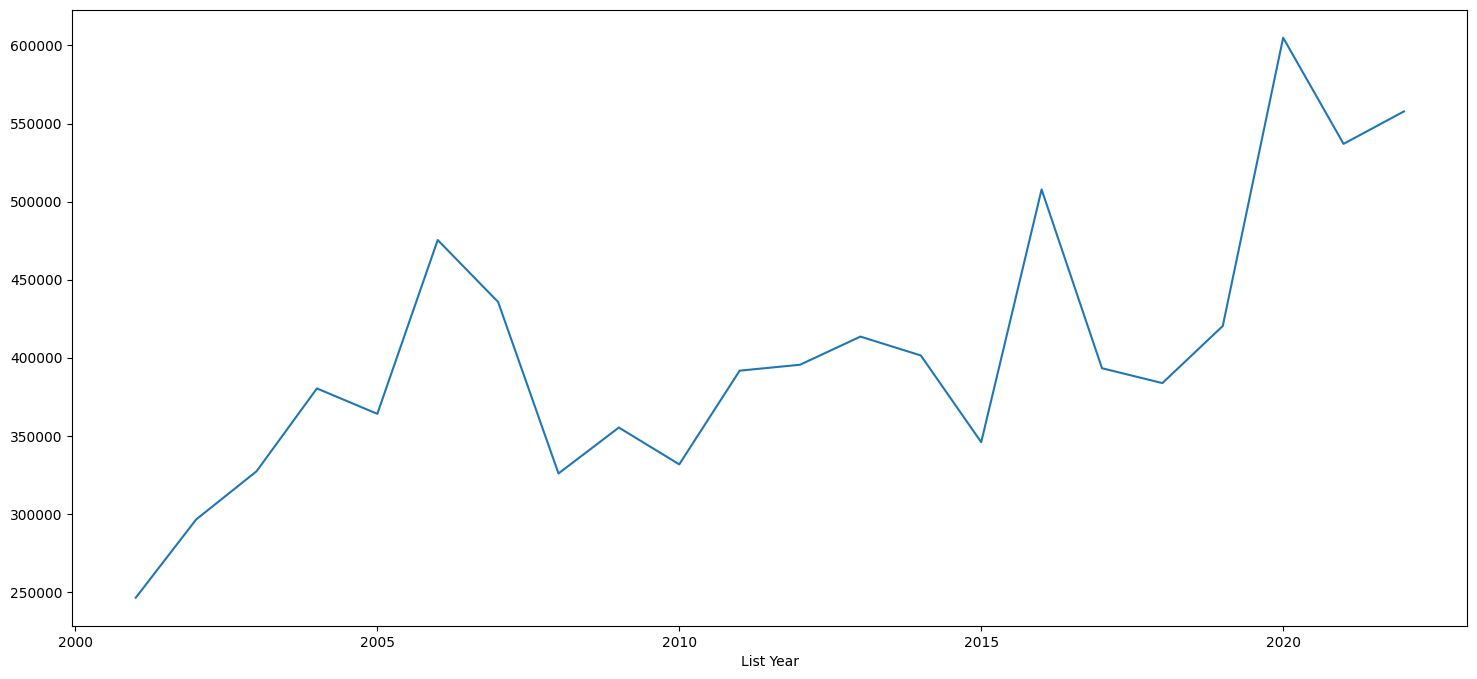

In [ ]:
plt.figure(figsize=(18,8))
data.groupby("List Year")["Sale Amount"].mean().plot()

In some reports, it is said that there was an economic crisis in 2007(one of the peaks)

Average Assessed Value, Sale Amount and Sales Ratio of properties from year to year?

In [ ]:
average_av = data.groupby(data['List Year'])['Assessed Value'].mean()
average_sa = data.groupby(data['List Year'])['Sale Amount'].mean()
average_sr = data.groupby(data['List Year'])['Sales Ratio'].mean()

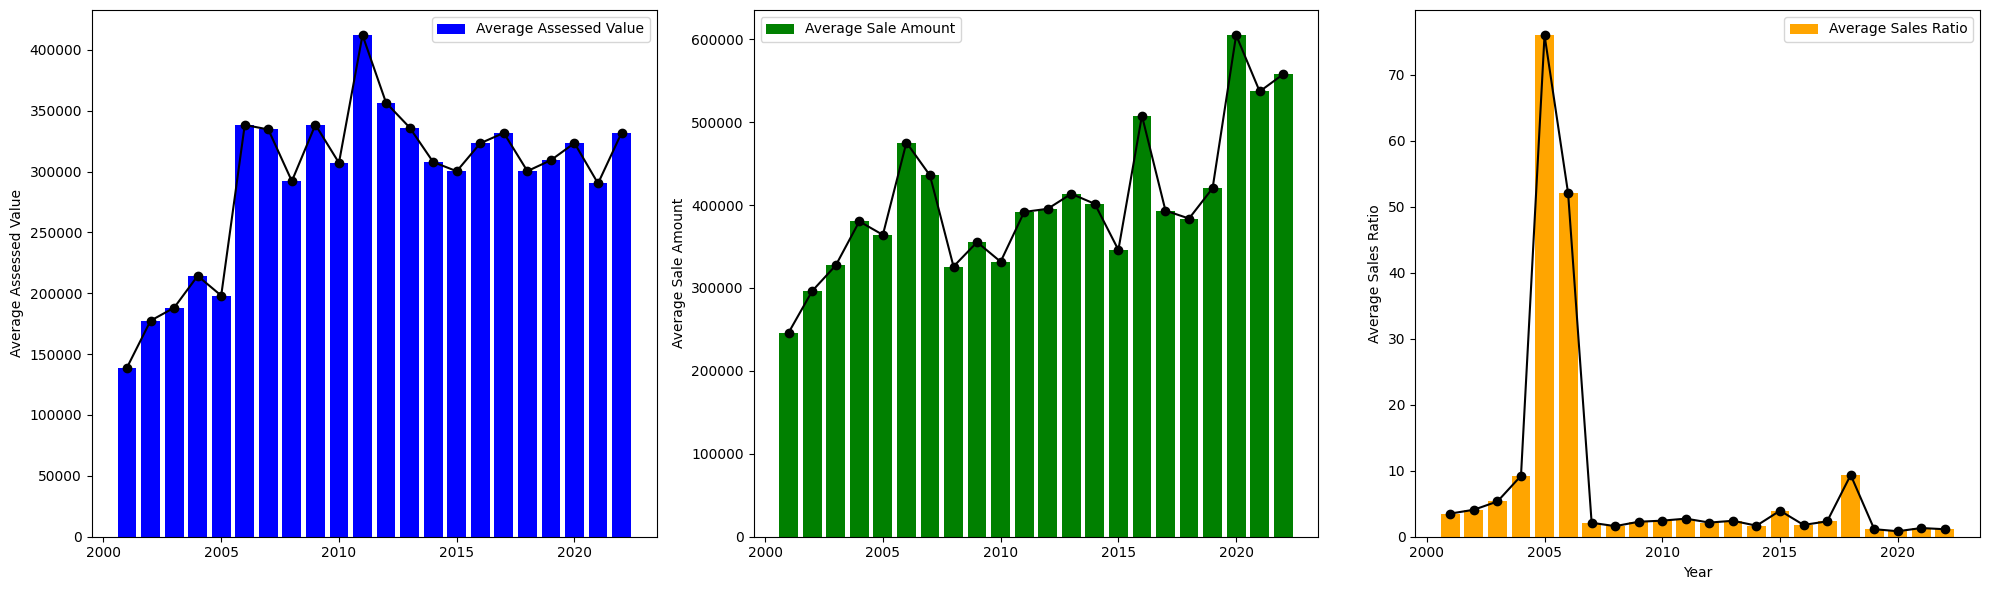

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6), sharex=True)

ax1.bar(average_av.index, average_av.values, label='Average Assessed Value', color='blue')
ax1.plot(average_av.index, average_av.values, marker='o', color='black')
ax1.set_ylabel('Average Assessed Value')
ax1.legend()

ax2.bar(average_sa.index, average_sa.values, label='Average Sale Amount', color='green')
ax2.plot(average_sa.index, average_sa.values, marker='o', color='black')
ax2.set_ylabel('Average Sale Amount')
ax2.legend()

ax3.bar(average_sr.index, average_sr.values, label='Average Sales Ratio', color='orange')
ax3.plot(average_sr.index, average_sr.values, marker='o', color='black')
ax3.set_ylabel('Average Sales Ratio')
ax3.legend()

plt.xlabel('Year')
plt.tight_layout()
plt.show()

To find sales in each year

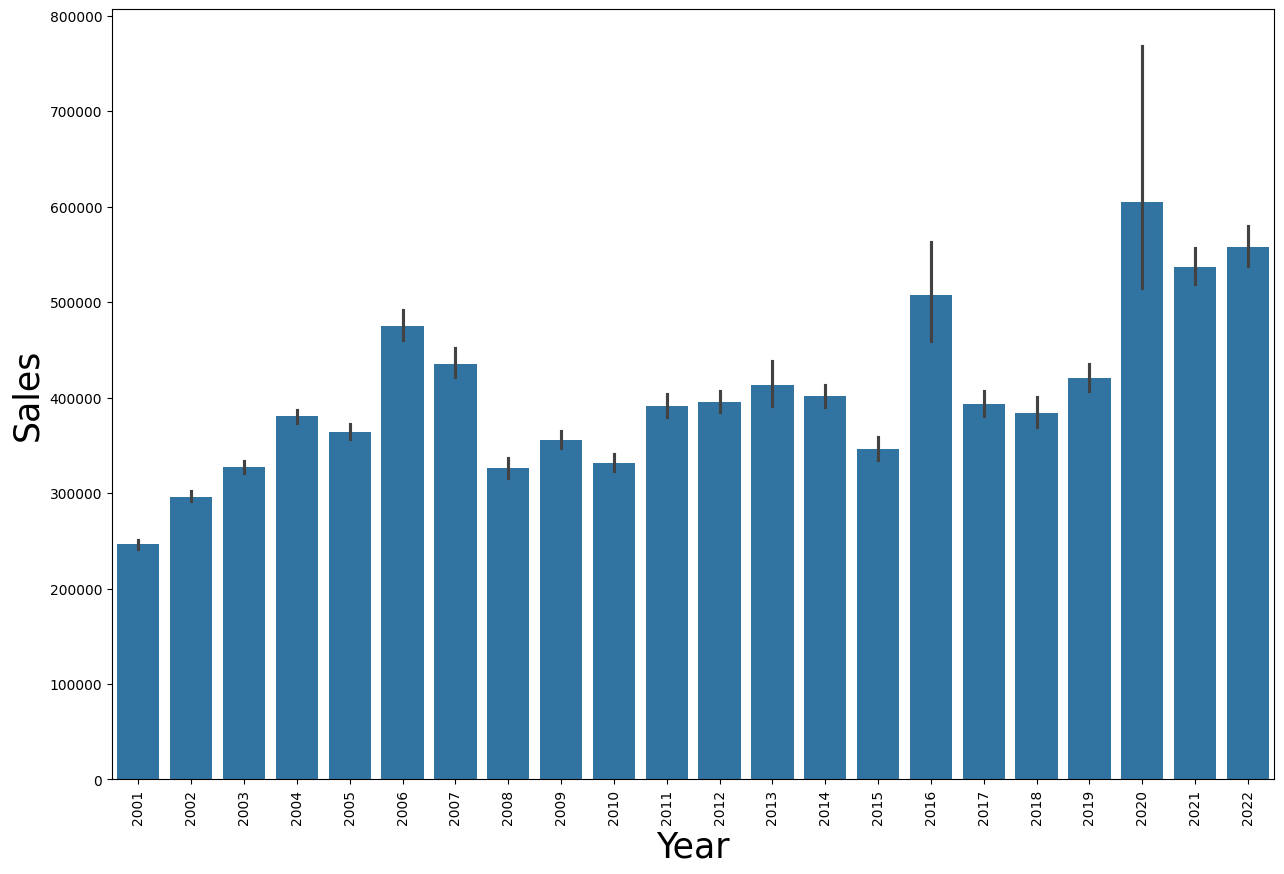

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x="List Year", y="Sale Amount", data=data)
plt.xticks(rotation='vertical')
plt.ylabel('Sales',fontsize=25)
plt.xlabel('Year',fontsize=25)
plt.show()

number of properties sold in each year

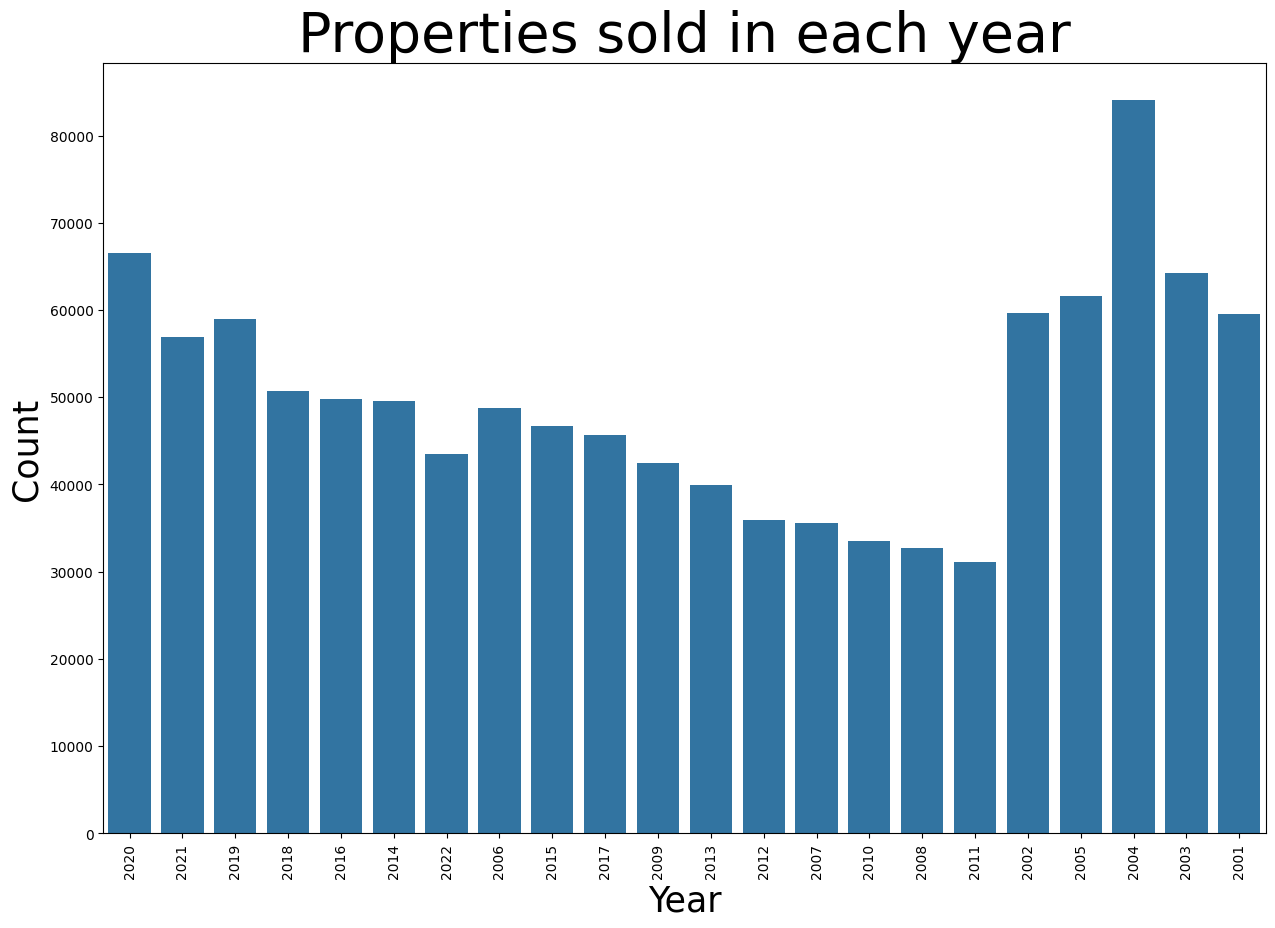

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x="List Year",data=data, order = data.groupby(by=['List Year'])['Property Type'].count().sort_values(ascending=False).index)
plt.xticks(rotation='vertical')
plt.title('Properties sold in each year',fontsize=40)
plt.ylabel('Count',fontsize = 25)
plt.xlabel('Year',fontsize = 25)
plt.show()

In [ ]:
# import plotly.express as px

# px.scatter(x='Town',
#            y='Sale Amount',
#            color='Property Type',
#             data_frame=data_without_the_max
# )

In [ ]:
for col in numerical_columns:
        skewness = data[col].skew()
        print(f"{col}: Skewness = {skewness:.2f}")

All columns are highly skewed

## Data cleaning

In [ ]:
data = data.drop(columns=["Non Use Code","Assessor Remarks","OPM remarks","Location"])

In [ ]:
data = data[data['Address'].notna()]
data = data[data['Date Recorded'].notna()]

In [ ]:
data.isnull().sum()

,0
Serial Number,0
List Year,0
Date Recorded,0
Town,0
Address,0
Assessed Value,0
Sale Amount,0
Sales Ratio,0
Property Type,382399
Residential Type,398342


In [ ]:
# We rename columns to snake_case for better readability, consistency,
# and easier access in Python code, avoiding issues with spaces or capital letters.

data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')
print(data.columns)

Index(['serial_number', 'list_year', 'date_recorded', 'town', 'address',
       'assessed_value', 'sale_amount', 'sales_ratio', 'property_type',
       'residential_type'],
      dtype='object')


In [ ]:
data['date_recorded'] = pd.to_datetime(data['date_recorded'],  errors='coerce') #If 'coerce', then invalid parsing will be set as NaT


In [ ]:
data['date_recorded'] = data['date_recorded'].apply(lambda x: x.timestamp() if pd.notnull(x) else None )

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1097578 entries, 0 to 1097628
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   serial_number     1097578 non-null  int64  
 1   list_year         1097578 non-null  int64  
 2   date_recorded     1097578 non-null  float64
 3   town              1097578 non-null  object 
 4   address           1097578 non-null  object 
 5   assessed_value    1097578 non-null  float64
 6   sale_amount       1097578 non-null  float64
 7   sales_ratio       1097578 non-null  float64
 8   property_type     715179 non-null   object 
 9   residential_type  699236 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 92.1+ MB


In [ ]:
len(data['address'].unique()), len(data['town'].unique())

(771931, 170)

In [ ]:
# data.address = data.address.apply(lambda x: x.strip()) #remove extra whitespaces and specified characters from the start and from the end
location_stats = data.groupby('address')['address'].agg('count').sort_values(ascending=False)
location_stats

,address
address,
MULTI ADDRESSES,620
8 SOUTH RD,498
51 OLD SPRINGFIELD RD,204
312 N BISHOP AVE,114
RIGGS ST,106
...,...
#780-2 SEAVIEW VILLAGE,1
"$80,000",1
(2 MIMOSA DRIVE)2 DAFFODIL LAN,1


In [ ]:
len(location_stats[location_stats<=10])

771148

In [ ]:
!pip install usaddress

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.6 MB/s eta 0:00:00


In [ ]:
import usaddress
def standardize_address(address):

    address = address.lower()
# Replace variations of common terms for street types
    address = address.replace("road", "rd").replace("street", "st").replace("avenue", "ave")
    address = address.replace("boulevard", "blvd").replace("drive", "dr").replace("lane", "ln")
    address = address.replace("place", "pl").replace("court", "ct").replace("circle", "cir")
    address = address.replace("highway", "hwy").replace("expressway", "expwy").replace("route", "rte")
    address = address.replace("north", "n").replace("south", "s")
    address = address.replace("east", "e").replace("west", "w")
    address = address.replace("apartment", "apt").replace("suite", "ste").replace("floor", "flr")
    address = address.replace("building", "bldg")
    address = address.replace("farm road", "rd")
    address = address.replace("parkway", "pkwy").replace("terrace", "ter").replace("alley", "aly")
    address = address.replace("plaza", "plz").replace("crescent", "cres")

    return address

def extract_street_info(address):
    try:
        address = standardize_address(address)
        parsed_address = usaddress.tag(address)

        # Extract street name and street type
        street_name = parsed_address[0].get('StreetName', None)
        street_type = parsed_address[0].get('StreetNamePostType', None)

        return pd.Series([street_name, street_type])

    except usaddress.RepeatedLabelError:
        # Handle cases where there are repeated labels
        return pd.Series([None, None])

In [ ]:
import re

def standardize_street_type(street_type):

    street_type = street_type.lower()
    unwanted_chars = ['un', "*", "+", ".", ",", "!", "?", "@", "#", "$", "%", "^", "&", "(", ")", "_", "-", "=", "[", "]", "{", "}", ";", ":", "<", ">", "/", "\\"]

    unwanted_chars_str = ''.join([re.escape(char) for char in unwanted_chars])
    #regex to remove unwanted characters
    street_type = re.sub(f"[{unwanted_chars_str}]", "", street_type)

    replacements = {
        "road": "rd",
        "street": "st",
        "avenue": "ave",
        'avnue' : 'ave',
        "boulevard": "blvd",
        'blv' : 'blvd',
        "drive": "dr",
        "lane": "ln",
        "place": "pl",
        "court": "ct",
        "circle": "cir",
        'crcle' : 'cir',
        "highway": "hwy",
        'hgwy': 'hwy',
        "expressway": "expwy",
        "route": "rte",
        "farm road": "rd",
        'farm rd' : 'rd',
        "parkway": "pkwy",
        'pky' : 'pkwy',
        'pwy': 'pkwy',
        "terrace": "ter",
        "alley": "aly",
        "plaza": "plz",
        "crescent": "cres",
        'circl': 'cir',
        'villiage': 'vlg',
        'village': 'vlg',
        'vill' : 'vlg',
        'mountain' : 'mt',
        'mtn' : 'mt',
        'garden' : 'gdn',
        'gdns' : 'gdn',
        'flds' : 'field',
        'fields' : 'field',
        'fld' : 'field',
        'corners' : 'corner',
        'cors' : 'course',
        'crse' : 'course',
        'grove' : 'grv',
        'square' : 'sq',
        'mills' : 'mill',
        'trls' : 'trails',
        'brg' : 'bridge'
    }

    standardized_type = replacements.get(street_type, street_type)
    standardized_type = standardized_type.strip()


    valid_street_types =['rd', 'st', 'hwy', 'ave', 'blvd', 'ln', 'dr', 'ct', 'pl', 'cir', 'pkwy', 'ter', 'alley', 'cres',
                          'way','expwy','rte', 'aly','cres',
                          "road", 'street', 'avenue', 'boulevard', 'drive', 'lane', 'place', 'highway', 'expressway', 'route', 'place',
                          'court', 'circle','farm road', 'parkway', 'terrace', 'plaza', 'crescent', 'ridge' ]



    for street_type in valid_street_types:
      if standardized_type.find(street_type) != -1:  # Check if the street type is in the input string
          return street_type

    return standardized_type









In [ ]:
data[['street_name', 'street_type']] = data['address'].apply(extract_street_info)


In [ ]:
data = data[data['street_name'].notna()]
data = data[data['street_type'].notna()]

In [ ]:
data['street_type'] = data['street_type'].apply(standardize_street_type)

data.drop(columns=['address'], inplace=True)

In [ ]:
data.nunique()

,0
serial_number,95385
list_year,22
date_recorded,6920
town,170
assessed_value,97408
sale_amount,59115
sales_ratio,536482
property_type,11
residential_type,5
street_name,29596


In [ ]:
location_stats = data.groupby('street_name')['street_name'].agg('count').sort_values(ascending=False)
location_stats

,street_name
street_name,
main,20418
park,5378
prospect,4030
maple,3954
washington,3706
...,...
reat hill,1
"a, b+c newport",1
a-1 center,1


In [ ]:
len(location_stats[location_stats<=10])

18319

I would like to remove records with street names that appear fewer than 10 times.

In [ ]:

to_drop = location_stats[location_stats <= 10].index
data = data[~data['street_name'].isin(to_drop)]

In [ ]:
data.isnull().sum()

,0
serial_number,0
list_year,0
date_recorded,0
town,0
assessed_value,0
sale_amount,0
sales_ratio,0
property_type,341143
residential_type,355050
street_name,0


In [ ]:
street_type_stats = data.groupby('street_type')['street_type'].agg('count').sort_values(ascending=False)
to_drop = street_type_stats[street_type_stats <= 5].index
data = data[~data['street_type'].isin(to_drop)]
street_type_stats = data.groupby('street_type')['street_type'].agg('count').sort_values(ascending=False)


In [ ]:
street_type_stats

,street_type
street_type,
rd,294667
st,238356
ave,136732
dr,128575
l,67375
...,...
vis,6
aly,6
brach,6


In [ ]:
data.shape[0]

1001520

In [ ]:
# to_drop = street_type_stats[street_type_stats <= 10].index
# data = data[~data['street_type'].isin(to_drop)]

In [ ]:
# street_type_stats = data.groupby('street_type')['street_type'].agg('count').sort_values(ascending=False)
# q1 = street_type_stats.quantile(0.25)
# # q3 = street_type_stats.quantile(0.75)
# # iqr = q3 - q1
# # lower_tail = q1 - (1.5 * iqr)

# # Filter out street types that are below the q1
# to_keep = street_type_stats[street_type_stats > q1].index
# data = data[data['street_type'].isin(to_keep)]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001520 entries, 1 to 1097628
Data columns (total 11 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   serial_number     1001520 non-null  int64  
 1   list_year         1001520 non-null  int64  
 2   date_recorded     1001520 non-null  float64
 3   town              1001520 non-null  object 
 4   assessed_value    1001520 non-null  float64
 5   sale_amount       1001520 non-null  float64
 6   sales_ratio       1001520 non-null  float64
 7   property_type     660444 non-null   object 
 8   residential_type  646540 non-null   object 
 9   street_name       1001520 non-null  object 
 10  street_type       1001520 non-null  object 
dtypes: float64(4), int64(2), object(5)
memory usage: 91.7+ MB


In [ ]:
data.shape[0]

1001520

In [ ]:
residential_type_mode=data["residential_type"].mode()[0]
property_type_mode=data["property_type"].mode()[0]
data["residential_type"].fillna(residential_type_mode, inplace=True)
data["property_type"].fillna(property_type_mode, inplace=True)


<ipython-input-50-5e1d2504084c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["residential_type"].fillna(residential_type_mode, inplace=True)
<ipython-input-50-5e1d2504084c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [ ]:
data.isnull().sum()

,0
serial_number,0
list_year,0
date_recorded,0
town,0
assessed_value,0
sale_amount,0
sales_ratio,0
property_type,0
residential_type,0
street_name,0


In [ ]:
data.dtypes

,0
serial_number,int64
list_year,int64
date_recorded,float64
town,object
assessed_value,float64
sale_amount,float64
sales_ratio,float64
property_type,object
residential_type,object
street_name,object


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
data['street_name'] = le.fit_transform(data['street_name'])

data = pd.get_dummies(data, columns=['town', 'street_type', 'residential_type', 'property_type'], drop_first=True)

In [ ]:
data.shape

(1001520, 356)

In [ ]:
# corr_matrix = data.corr()
# plt.figure(figsize=(10, 5))
# sns.heatmap(corr_matrix, annot=True, cmap='Blues', center=0, fmt='.2f')
# plt.title('Correlation Heatmap')
# plt.show()

## Outliers

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_outliers(numerical_columns):
    plt.figure(figsize=(15, 5))

    for i, col in enumerate(numerical_columns):
        plt.subplot(1, len(numerical_columns), i+1)
        sns.boxplot(data=data[col], color='red', orient='v')
        plt.title(col)

    plt.tight_layout()
    plt.show()





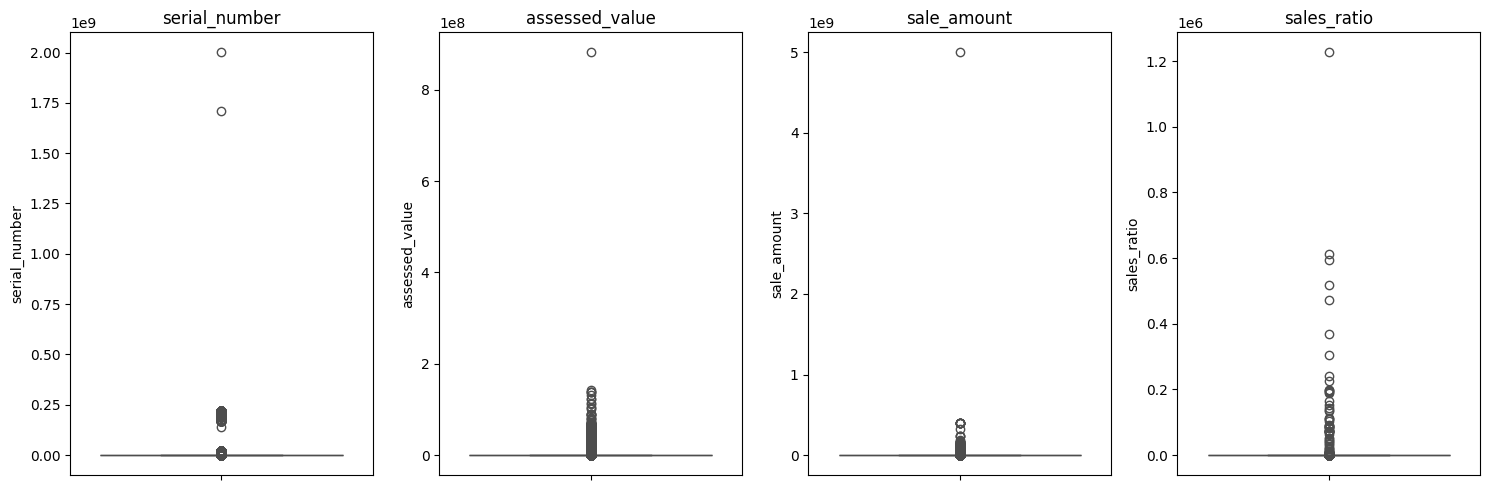

In [ ]:
columns_has_outlier = ['serial_number', 'assessed_value', 'sale_amount', 'sales_ratio']
visualize_outliers(columns_has_outlier)

As we see, There is huge outliers, i want to delete them

In [ ]:
def outlier_del(df, column, mode):

    q1 = df.loc[:, column].quantile(0.25)
    q3 = df.loc[:, column].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - (1.5 * iqr)
    upper_tail = q3 + (1.5 * iqr)

    total_outliers = df[(df.loc[:, column] <= lower_tail) | (df.loc[:, column] >= upper_tail)].loc[:, column].count()
    total_row = df.loc[:, column].count()
    percent_outliers = round(((total_outliers / total_row) * 100), 2)

    if mode == 'summary':
        print(f'Total outliers in {column}: {total_outliers}, outliers percentage: {percent_outliers}%')
    elif mode == 'df':
        # Find the indices of rows that are not outliers
        non_outlier_indices = df[(df[column] >= lower_tail) & (df[column] <= upper_tail)].index
        df.drop(df.index[~df.index.isin(non_outlier_indices)], inplace=True)  # Keep only non-outlier rows
    else:
        print('Check the input')

Total outliers in serial_number: 56800, outliers percentage: 5.67%
Total outliers in assessed_value: 90428, outliers percentage: 9.03%
Total outliers in sale_amount: 83928, outliers percentage: 8.38%
Total outliers in sales_ratio: 97787, outliers percentage: 9.76%


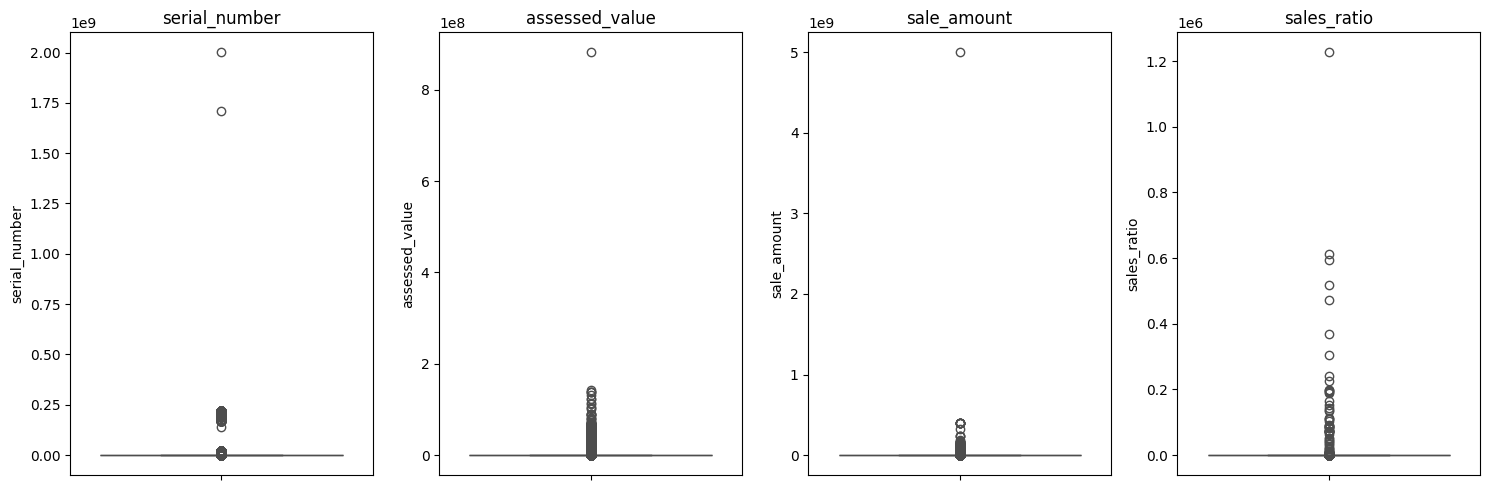

In [ ]:
for i in range(0, len(columns_has_outlier)):
    outlier_del(data, columns_has_outlier[i], 'summary')

visualize_outliers(columns_has_outlier)

In [ ]:
# Delete outliers of columns contain outliers below 5%
for col in columns_has_outlier:
    outlier_del(data, col, 'df')

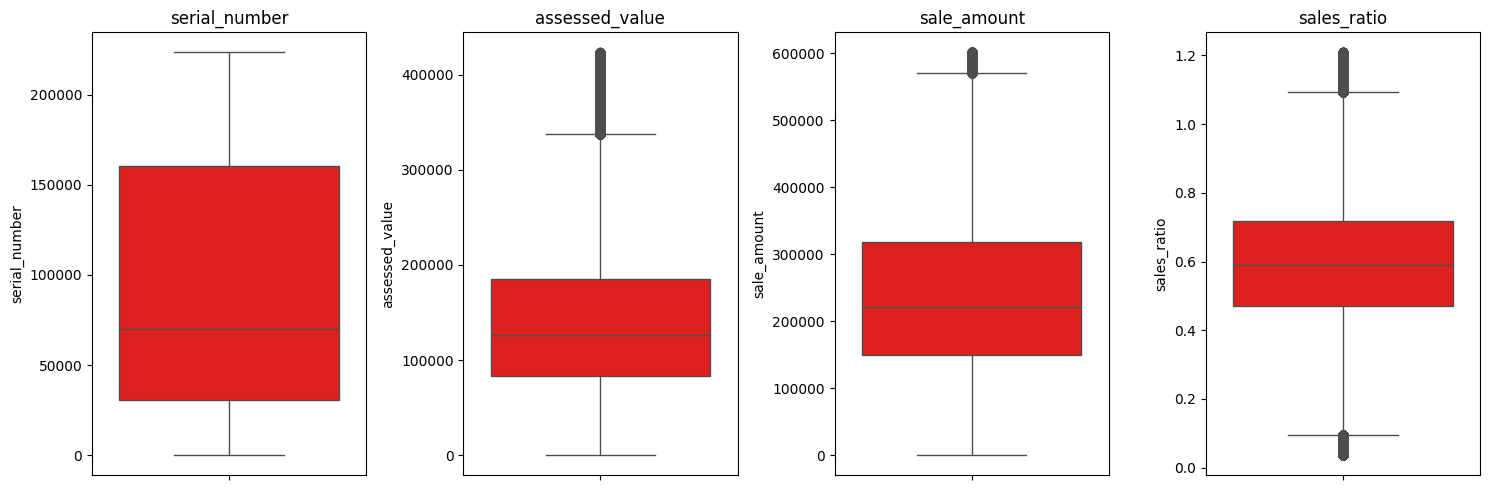

In [ ]:
visualize_outliers(columns_has_outlier)

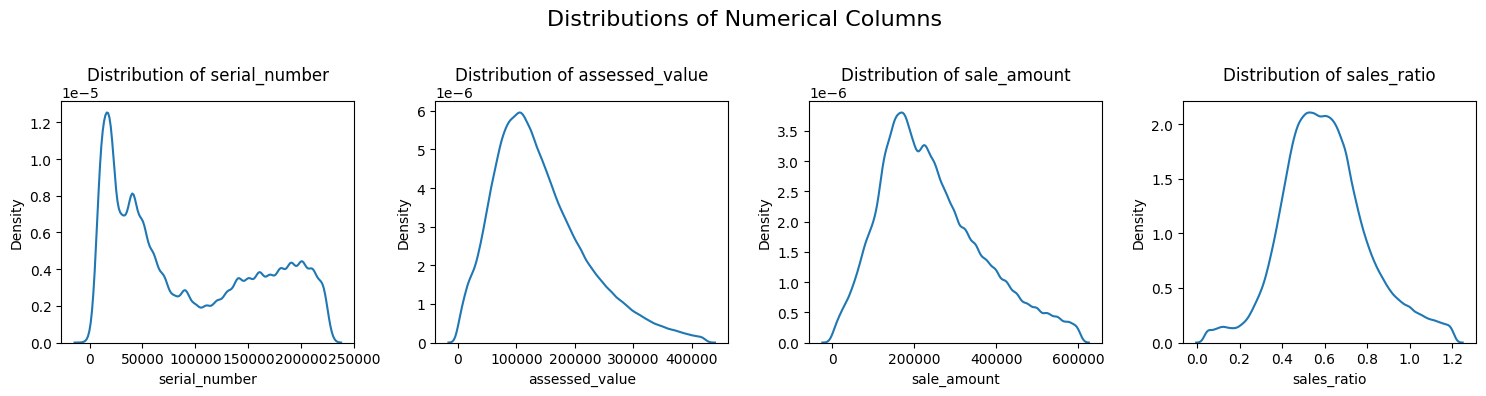

In [ ]:
fig, axes = plt.subplots(1, len(columns_has_outlier), figsize=(15, 4))
fig.suptitle('Distributions of Numerical Columns', fontsize=16)

for i, col in enumerate(columns_has_outlier):
    sns.kdeplot(data[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', pad=15)

plt.tight_layout()
plt.subplots_adjust(top=0.75)
plt.show()

In [ ]:
data.shape

(748090, 356)

Almost all of numerical features have extreme outliers.

We have deleted the outliers,and our data is not skewed yet, so it is more appropriate to use standardscaling that removes the mean and scaling to unit variance. <br>
This results in a distribution with a mean of 0 and a standard deviation of 1.
z= (x−μ)/σ<br>

MinMaxScaler scales features to between 0 and 1.

it’s beneficial to try both scalers and evaluate the performance of our models using cross-validation to see which scaling method yields better results in terms of prediction accuracy and model performance.

i think because there is one hot encoded columns, i prefer to use minmaxscaler.



In [ ]:
X = data.drop(columns=['sale_amount'])
y = data['sale_amount']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(598472, 355) (598472,)
(149618, 355) (149618,)


In [ ]:
from sklearn.preprocessing import  MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Modelling

###LinearRegression:
$$\min_{\omega} \| X\omega - y\|_2^2$$

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
y_preds =[]
regressors = []

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_linear = lr.predict(X_test)
y_preds.append(y_pred_linear)
regressors.append('linear')
y_preds

[array([364820.06395979, -48459.41528526, 233461.11534628, ...,
        199693.62415902, 193607.29193861, 203410.08780793])]

In [ ]:
y1 =y_test.max()
y2 = y_pred_linear.max()
ymax = y1 if y1>y2 else y2
ymax

679422.0883805766

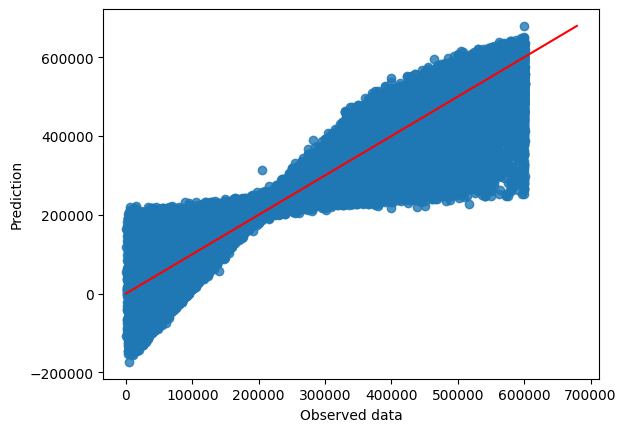

In [ ]:
x = np.arange(0.01,ymax)
plt.plot(x, x, c='red')
plt.scatter(x=y_test,y= y_pred_linear, alpha =0.8)
plt.xlabel('Observed data')
plt.ylabel('Prediction');

###Polynomial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pf = PolynomialFeatures(degree=3, interaction_only=True)
X_train_pf = pf.fit_transform(X_train)
X_test_pf = pf.fit_transform(X_test)

NameError: name 'X_train' is not defined

In [ ]:
lr2 = LinearRegression(fit_intercept=False)
y_pred_polynomial = lr2.fit(X_train_pf, y_train).predict(X_test_pf)
y_preds.append(y_pred_polynomial)
regressors.append('polynomial')

In [ ]:
y1 =y_test.max()
y2 = y_pred_polynomial.max()
ymax = y1 if y1>y2 else y2
x = np.arange(0.01,ymax , 1)
plt.plot(x, x, c='red')
plt.scatter(x=y_test, y=y_pred_polynomial)
plt.xlabel('Observed data')
plt.ylabel('Prediction')

In [ ]:
#fine tuning polynomial degree hyperparameter
from sklearn.model_selection import cross_val_score

best_degree = 0
best_score = -np.inf

for degree in range(1,4):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    scores = cross_val_score(model, X_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_degree = degree
        best_score = mean_score

print(f"Best degree: {best_degree}, Best score: {best_score}")

In [ ]:
# Train the final model with the best degree
poly = PolynomialFeatures(degree=best_degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred_polynomial_best = model.predict(X_test_poly)
y_preds.append(y_pred_polynomial_best)
regressors.append('polynomial_best')


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_polynomial_best, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Ideal fit')
plt.xlabel('Dislike Count')
plt.ylabel('Predicted Dislike Count')
plt.title('Polynomial Regression Predictions')
plt.legend()
plt.show()

###Ridge
$$\min_{\omega} \| X\omega - y\|_2^2 + \alpha \|\omega\|_2$$

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
lr3 = Ridge(alpha=10)
lr3.fit(X_train, y_train)

Ridge(alpha=10)

In [ ]:
y_pred_ridge = lr3.predict(X_test)
y_preds.append(y_pred_ridge)
regressors.append('ridge')

y1 =y_test.max()
y2 = y_pred_ridge.max()
ymax = y1 if y1>y2 else y2

Text(0, 0.5, 'Prediction')

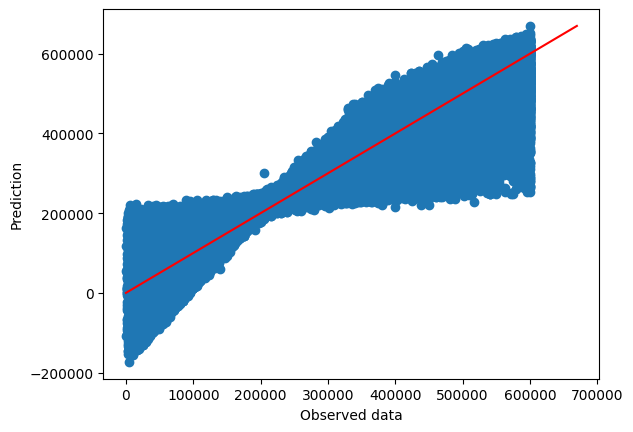

In [ ]:
x = np.arange(0.01,ymax , 1)
plt.plot(x, x, c='red')
plt.scatter(x=y_test, y=lr3.predict(X_test))
plt.xlabel('Observed data')
plt.ylabel('Prediction')

In [ ]:
# we can fine-tune the alpha hyperparameter of ridge
# with 5-fold cross-validation
# from sklearn.model_selection import GridSearchCV

# alpha_values = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,
#                          20,30,35,40,45,50,55,100]}

# ridge = Ridge()
# grid_search = GridSearchCV(ridge, alpha_values, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# print("Best value for alpha : ",grid_search.best_params_)
# print("Best score : ", grid_search.best_score_)
# y_pred_ridge_best = grid_search.predict(X_test)
# y_preds.append(y_pred_ridge_best)
# regressors.append('ridge_best')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.3051e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.30752e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.31034e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.30536e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning

KeyboardInterrupt: 

### Linear Lasso:
$$\min_{\omega} \frac{1}{n_{sample}}\| X\omega - y\|_2^2 + \alpha \|\omega\|_1$$

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lr4 = Lasso(alpha=10)
lr4.fit(X_train, y_train)

Lasso(alpha=10)

In [ ]:
y_pred_lasso = lr4.predict(X_test)
y_preds.append(y_pred_lasso)
regressors.append('lasso')

y1 =y_test.max()
y2 = y_pred_lasso.max()
ymax = y1 if y1>y2 else y2

Text(0, 0.5, 'Prediction')

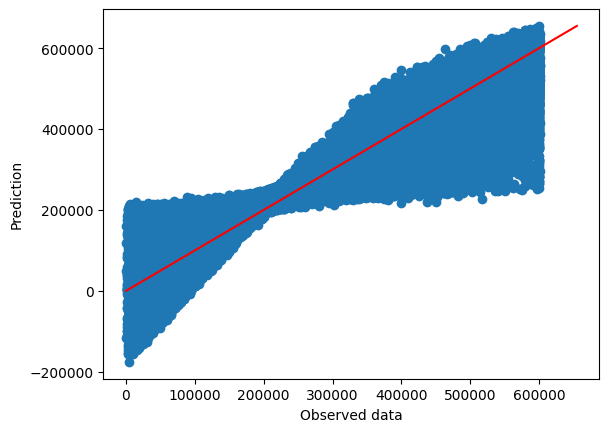

In [ ]:

x = np.arange(0.01,ymax , 1)
plt.plot(x, x, c='red')
plt.scatter(x=y_test, y=y_pred_lasso)
plt.xlabel('Observed data')
plt.ylabel('Prediction')

In [ ]:
# fine-tune for lasso

# LassoRegression = Lasso()
# hyperParameters = {
#     'alpha':  [0.1, 0.5, 1, 5, 10, 20, 50, 100],
#     'max_iter': [1000, 5000, 10000],  # Increased max_iter
#     'tol': [1e-4, 1e-3]                          # Lower tolerance for convergence
# }
# LassoRegressor = GridSearchCV(LassoRegression, hyperParameters, scoring='neg_mean_squared_error', cv=5)
# LassoRegressor.fit(X_train,y_train)

# print("Best value for alpha : ",LassoRegressor.best_params_)
# print("Best score : ", LassoRegressor.best_score_)

# y_pred_lasso_best = LassoRegressor.predict(X_test)
# y_preds.append(y_pred_lasso_best)
# regressors.append('lasso_best')

### Elastic-Net:
$$\min_{\omega} \frac{1}{n_{sample}} \| X\omega - y\|_2^2 + \rho\alpha \|\omega\|_1 + \frac{\alpha(1-\rho)}{2} \|\omega\|_2, ~~~~ 0\leq\rho\leq1 $$

In [ ]:
from sklearn.linear_model import ElasticNet

Text(0, 0.5, 'Prediction')

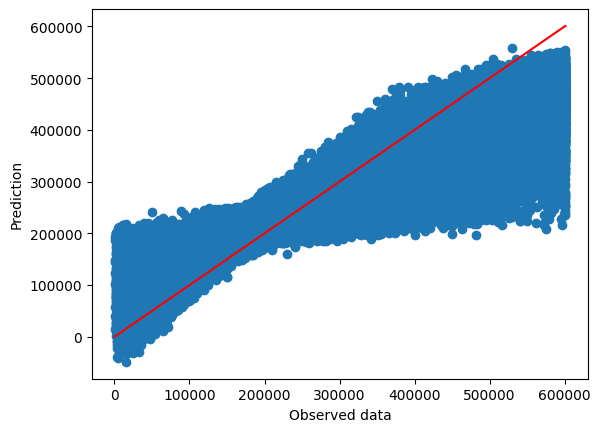

In [ ]:
lr5 = ElasticNet(alpha=1, l1_ratio=0.99)
lr5.fit(X_train, y_train)
y_pred_eNet = lr5.predict(X_test)
y_preds.append(y_pred_eNet)
regressors.append('eNet')

y1 =y_test.max()
y2 = y_pred_eNet.max()
ymax = y1 if y1>y2 else y2

x = np.arange(0.01,ymax , 1)
plt.plot(x, x, c='red')
plt.scatter(x=y_test, y= y_pred_eNet)
plt.xlabel('Observed data')
plt.ylabel('Prediction')

In [ ]:
# parametersGrid = {"max_iter": [1, 5, 10],
#                   "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
#                   "l1_ratio": np.arange(0.0, 1.0, 0.1)}

# eNetRegression = ElasticNet()
# eNetRegressor = GridSearchCV(eNetRegression, parametersGrid, scoring='r2', cv=5)
# eNetRegressor.fit(X_train, y_train)

# print("Best value for alpha : ",eNetRegressor.best_params_)
# print("Best score : ", eNetRegressor.best_score_)

# y_pred_eNet_best = eNetRegressor.predict(X_test)
# y_preds.append(y_pred_eNet_best)
# regressors.append('eNet_best')

###SGD regressor





In [ ]:
from sklearn.linear_model import SGDRegressor

Text(0, 0.5, 'Prediction')

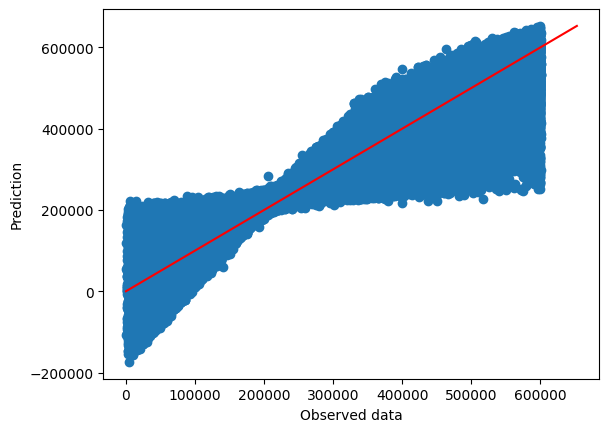

In [ ]:
sgd_lasso = SGDRegressor(penalty='l1', max_iter=100000, tol=1e-3)
sgd_lasso.fit(X_train, y_train)
y_pred_sgd_lasso = sgd_lasso.predict(X_test)

y_preds.append(y_pred_sgd_lasso)
regressors.append('sgd_lasso')

y1 =y_test.max()
y2 = y_pred_sgd_lasso.max()
ymax = y1 if y1>y2 else y2

x = np.arange(0.01,ymax , 1)
plt.plot(x, x, c='red')
plt.scatter(x=y_test, y= y_pred_sgd_lasso)
plt.xlabel('Observed data')
plt.ylabel('Prediction')

### Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_dt = dt_regressor.predict(X_test)

y_preds.append(y_pred_dt)
regressors.append('dt')
y_pred_dt

array([410000.,  40000., 221650., ..., 205000., 190000., 180000.])

### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

In [ ]:
y_pred_rf = rf_regressor.predict(X_test)
y_preds.append(y_pred_rf)
regressors.append('rf')

In [ ]:
# param_grid = {
#     'n_estimators'     : [20,30,40],
#     'max_depth'        : [8,12,16]
# }

# rf_regressor1 = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid,cv=3)
# rf_regressor1.fit(X_train, y_train)

# print("Best value for alpha : ",rf_regressor1.best_params_)
# print("Best score : ", rf_regressor1.best_score_)


In [ ]:
# rfr = RandomForestRegressor(max_depth=rf_regressor1.best_params_['max_depth'],
#                             n_estimators=rf_regressor1.best_params_['n_estimators'])
# rfr.fit(X_train,y_train)

# y_pred_rf_best=rfr.predict(X_test)
# y_preds.append(y_pred_rf_best)
# regressors.append('rf_best')

###Gradient Boosting

In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.4 MB/s eta 0:00:00


In [ ]:
import xgboost as xgb

xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
ytrain_pred = xgb_regressor.predict(X_train)
y_pred_xgb = xgb_regressor.predict(X_test)
y_preds.append(y_pred_xgb)
regressors.append('xgb')

### kernel regression

#### Support Vector Regression (SVR)

In [ ]:
from sklearn.svm import SVR

In [ ]:
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
model.fit(X_train, y_train)

In [ ]:
y_pred_svr_rbf = model.predict(X_test)


y_preds.append(y_pred_svr_rbf)
regressors.append('svr_rbf')

In [ ]:
from sklearn.svm import SVR


kernels = ['rbf', 'poly', 'sigmoid']

for kernel in kernels:
    svr = SVR(kernel=kernel, C=1e3, gamma=0.1, degree=3 if kernel == 'poly' else None)

    svr.fit(X_train, y_train)

    y_pred = svr.predict(X_test)
    y_preds.append(y_pred)
    regressors.append(kernel)

### Poisson Regressor

In [ ]:
from sklearn.linear_model import PoissonRegressor

In [ ]:
model = PoissonRegressor()
model.fit(X_train, y_train)
y_pred_poisson = model.predict(X_test)
y_preds.append(y_pred_poisson)
regressors.append('poisson')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/glm.py:283: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


##Evaluation:
$$\max |\hat{y}_i -  y_i|$$

$$ \frac{1}{n} \sum |\hat{y}_i -  y_i|$$

$$ \frac{1}{n} \sum (\hat{y}_i -  y_i)^2$$

$$ 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}$$

In [ ]:
from sklearn.metrics import max_error,mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
def compute_metrics(X_test, y_pred, y_test):
    metrics = {
        'max_error': max_error(y_test,  y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': mean_squared_error(y_test, y_pred, squared=False),
        'R2 score': r2_score(y_test, y_pred),

    }
    return metrics

In [ ]:
regressors

['linear', 'ridge', 'lasso', 'eNet', 'sgd_lasso', 'dt', 'rf', 'xgb', 'poisson']

In [ ]:
metrics_dict = {name: {} for name in regressors}

for name, y_pred in zip(regressors, y_preds):
    metrics = compute_metrics(X_test, y_pred, y_test)
    metrics_dict[name] = metrics

metrics_df = pd.DataFrame(metrics_dict).T
print(metrics_df)

               max_error           MAE          RMSE  R2 score
linear     346983.543208  25591.196346  39112.789672  0.901110
ridge      347129.229899  25588.797001  39112.639007  0.901110
lasso      345070.970770  25599.790797  39233.331824  0.900499
eNet       379406.465192  36614.498818  51484.426205  0.828656
sgd_lasso  347160.297937  25649.848754  39128.546003  0.901030
dt          60900.000000    505.106843   1292.200123  0.999892
rf         111615.088510   2625.678334   3946.085419  0.998993
xgb        130846.531250   2667.432442   5148.077165  0.998287
poisson    422382.602350  29119.194822  44283.672353  0.873234


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

MSE and RMSE and Max Erro: Lower values are better.

R² Score: Compare the R² scores. The model with the higher R² score explains more of the variance in the target variable and is generally considered better.

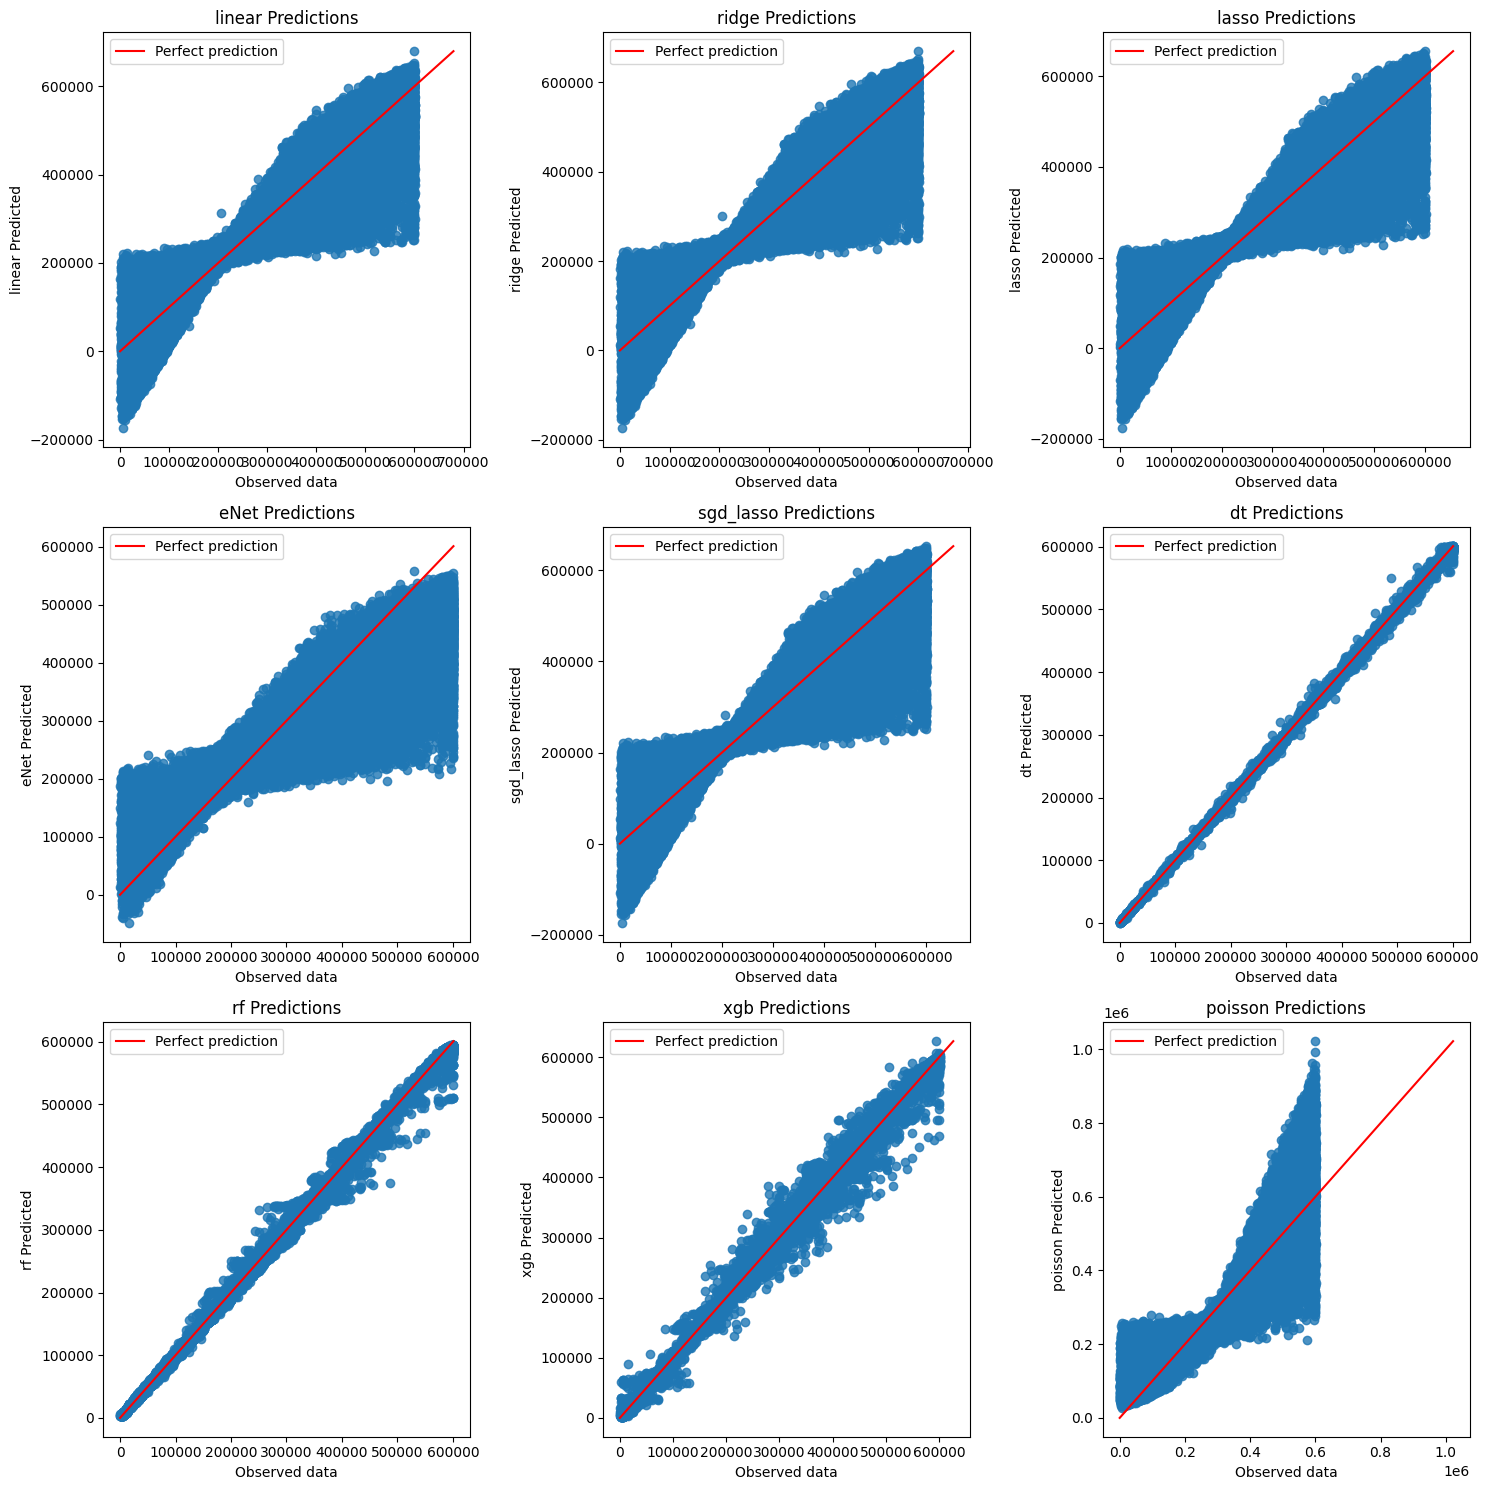

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plots_per_row = 3
n_plots = len(regressors)
n_rows = (n_plots // plots_per_row) + (n_plots % plots_per_row > 0)
fig, axes = plt.subplots(n_rows, plots_per_row, figsize=(15, 5 * n_rows))
axes = axes.flatten() #there are multiple rows

for i, (name, y_pred) in enumerate(zip(regressors, y_preds)):
    y1 = y_test.max()
    y2 = y_pred.max()
    ymax = max(y1, y2)
    x = np.arange(0.01, ymax)
    axes[i].plot(x, x, c='red', label="Perfect prediction")

    axes[i].scatter(x=y_test, y=y_pred, alpha=0.8)
    axes[i].set_xlabel('Observed data')
    axes[i].set_ylabel(f'{name} Predicted')
    axes[i].set_title(f'{name} Predictions')
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


as you can see Decision tree is the best! the ensemble random forest model is the second one and the gradient boosting model is in third place.
<br>we cam see at following part a simple MLP model would result good too.



Due to the time it took and high RAM usage, I wasn't able to hyperparameter tune the models and run the polynomial model. Of course, by removing the columns related to the address, I could have done all of that, but with these models, I think we've achieved the necessary results.

PCA

##ANN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
X_train.shape

(598472, 355)

In [ ]:
model = Sequential()


model.add(Dense(355,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse', metrics=['mean_absolute_error','mean_squared_error', 'mape'])

In [ ]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=32,epochs=10)

Epoch 1/10
18703/18703 [==============================] - 78s 4ms/step - loss: 33747216.0000 - mean_absolute_error: 3199.8262 - mean_squared_error: 33747216.0000 - mape: 2.0521 - val_loss: 24127758.0000 - val_mean_absolute_error: 2526.4348 - val_mean_squared_error: 24127758.0000 - val_mape: 1.5965
Epoch 3/10
18703/18703 [==============================] - 74s 4ms/step - loss: 23899562.0000 - mean_absolute_error: 2741.0850 - mean_squared_error: 23899562.0000 - mape: 1.7283 - val_loss: 24577214.0000 - val_mean_absolute_error: 2817.2075 - val_mean_squared_error: 24577214.0000 - val_mape: 1.6440
Epoch 4/10
18703/18703 [==============================] - 74s 4ms/step - loss: 18677590.0000 - mean_absolute_error: 2400.5005 - mean_squared_error: 18677590.0000 - mape: 1.4918 - val_loss: 28035208.0000 - val_mean_absolute_error: 3019.6235 - val_mean_squared_error: 28035208.0000 - val_mape: 1.7682
Epoch 5/10
18703/18703 [==============================] - 71s 4ms/step - loss: 15923078.0000 - mean_abs

In [ ]:
predictions = model.predict(X_test)

4676/4676 [==============================] - 7s 2ms/step


<ipython-input-117-f779f0fd3c70>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

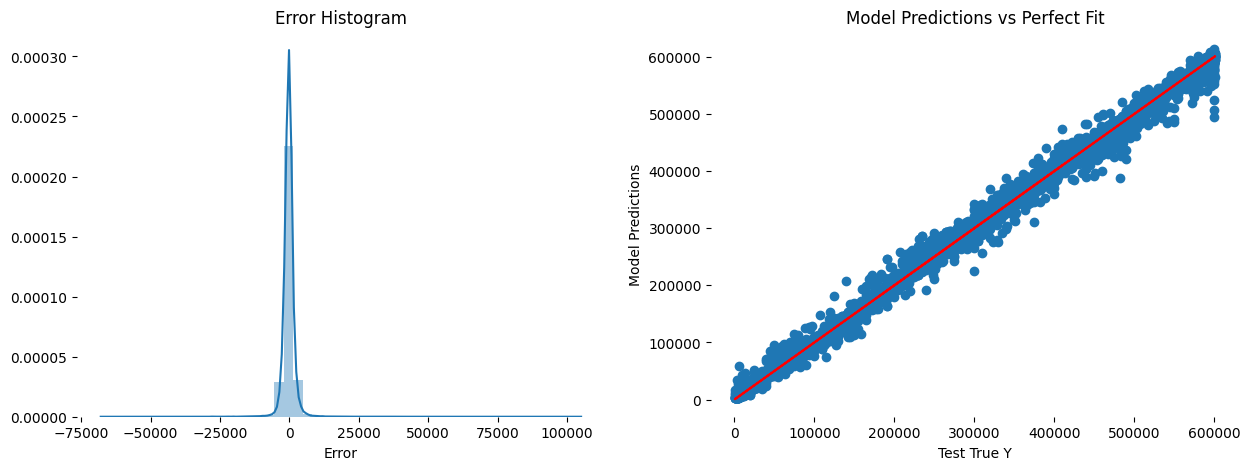

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.values.reshape(len(y_test), 1) - predictions
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')